In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clinical = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_data = pd.merge (clinical, mouse, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = mouse_data[['Drug','Timepoint','Tumor Volume (mm3)']].groupby(['Drug','Timepoint']).mean()
# Convert to DataFrame
mean_tumor = pd.DataFrame(mean_tumor)
# Preview DataFrame
mean_tumor.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor = mouse_data[['Drug','Timepoint','Tumor Volume (mm3)']].groupby(['Drug','Timepoint']).sem()

# Convert to DataFrame
sem_tumor = pd.DataFrame(sem_tumor)
# Preview DataFrame
sem_tumor.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_drug_timepoint = mean_tumor.pivot_table('Tumor Volume (mm3)', "Timepoint", 'Drug')
# Preview that Reformatting worked
mean_drug_timepoint.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


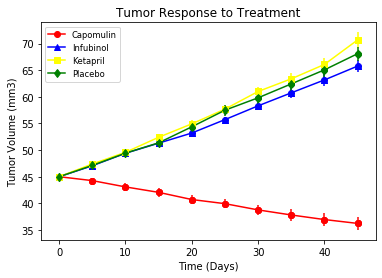

In [5]:
# Generate the Plot (with Error Bars)
sem_drug_timepoint = sem_tumor.pivot_table('Tumor Volume (mm3)', "Timepoint", 'Drug')
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
mark = ["o","^","s","d"]
colors = ["red",'blue','yellow','green']
counter = 0

for drug in drugs:
    x = mean_drug_timepoint.index.values
    y = mean_drug_timepoint.loc[:, drug]
    error = sem_drug_timepoint.loc[:, drug]
    plt.scatter(x, y, color=colors[counter])
    plt.plot(x, y, marker=mark[counter],color=colors[counter], label=drug)
    plt.errorbar(x, y, yerr=error, fmt=mark[counter], color=colors[counter])
    counter += 1

plt.legend(loc="best", fontsize="small", fancybox=True)


plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig("Tumor Response to Treatment")

In [6]:
# Show the Figure
plt.show()

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta = mouse_data[['Drug','Timepoint',"Metastatic Sites"]].groupby(['Drug','Timepoint']).mean()
# Convert to DataFrame
mean_meta = pd.DataFrame(mean_meta)
# Preview DataFrame
mean_meta.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_meta = mouse_data[['Drug','Timepoint',"Metastatic Sites"]].groupby(['Drug','Timepoint']).sem()
# Convert to DataFrame
sem_meta = pd.DataFrame(sem_meta)
# Preview DataFrame
sem_meta.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_meta_timepoint = mean_meta.pivot_table('Metastatic Sites', "Timepoint", 'Drug')
# Preview that Reformatting worked
mean_meta_timepoint.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


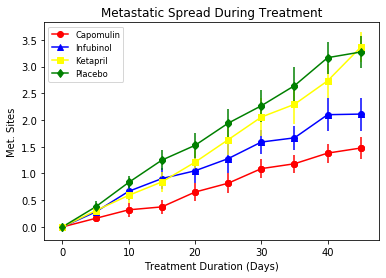

In [10]:
# Generate the Plot (with Error Bars)
sem_meta_timepoint = sem_meta.pivot_table('Metastatic Sites', "Timepoint", 'Drug')
counter = 0
for drug in drugs:
    x = mean_meta_timepoint.index.values
    y = mean_meta_timepoint.loc[:,drug]
    error = sem_meta_timepoint[drug]
    plt.scatter(x, y, color=colors[counter])
    plt.plot(x, y, marker=mark[counter],color=colors[counter], label=drug)
    plt.errorbar(x, y, yerr=error, fmt=mark[counter], color=colors[counter])
    counter += 1

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# Save the Figure
plt.savefig("Metastatic Spread During Treatment")
# Show Figure
plt.show()

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = mouse_data[['Drug','Timepoint','Mouse ID']].groupby(['Drug','Timepoint']).count()
# Convert to DataFrame
survival_count = pd.DataFrame(survival_count)
survival_count = survival_count.rename(columns={"Mouse ID":"Mouse Count"})
# Preview DataFrame
survival_count.head()
# Show Figure
plt.show()

In [12]:
# Minor Data Munging to Re-Format the Data Frames
life_timepoint = survival_count.pivot_table('Mouse Count', "Timepoint", 'Drug')
# Preview that Reformatting worked
life_timepoint.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [13]:
life_timepoint2 = life_timepoint.copy()
life_timepoint3 = life_timepoint.copy()
divider = 0
for drug in life_timepoint.columns:
    divider = life_timepoint.loc[0][drug]
    life_timepoint2[drug] = life_timepoint[drug]/divider*100
    life_timepoint3[drug] = life_timepoint2[drug].map("{:.2f}%".format)
life_timepoint3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%
5,100.00%,84.00%,100.00%,92.00%,92.00%,96.00%,96.15%,100.00%,96.15%,96.00%
10,100.00%,80.00%,84.00%,88.00%,84.00%,96.00%,88.46%,96.00%,88.46%,88.00%
15,96.00%,76.00%,84.00%,76.00%,84.00%,80.00%,65.38%,96.00%,88.46%,84.00%
20,92.00%,72.00%,80.00%,76.00%,80.00%,76.00%,65.38%,92.00%,80.77%,68.00%


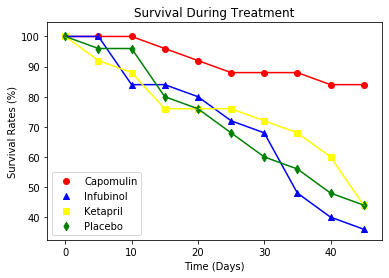

In [14]:
# Generate the Plot (Accounting for percentages)
counter = 0
for drug in drugs:
    plt.scatter(life_timepoint2.index.values, life_timepoint2.loc[:,[drug]], marker=mark[counter], color=colors[counter], label=drug)
    plt.plot(life_timepoint2.index.values, life_timepoint2.loc[:,[drug]], color=colors[counter])
    counter += 1
plt.legend()

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rates (%)")

# Save the Figure
plt.savefig("Survival During Treatment")

# Show Figure
plt.show()

In [15]:
# Calculate the percent changes for each drug
changes = {}

for n in range(len(mean_drug_timepoint.columns)):
    x = mean_drug_timepoint.iloc[-1][n]
    y = mean_drug_timepoint.iloc[0][n]
    changes[mean_drug_timepoint.columns[n]]= (x-y)/y*100
# Display the data to confirm
changes = pd.Series(changes)
changesdf = pd.DataFrame(changes)
changesdf = changesdf.rename(columns={0:"Percentage"})

changesdf


,Percentage
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134
Zoniferol,46.579751


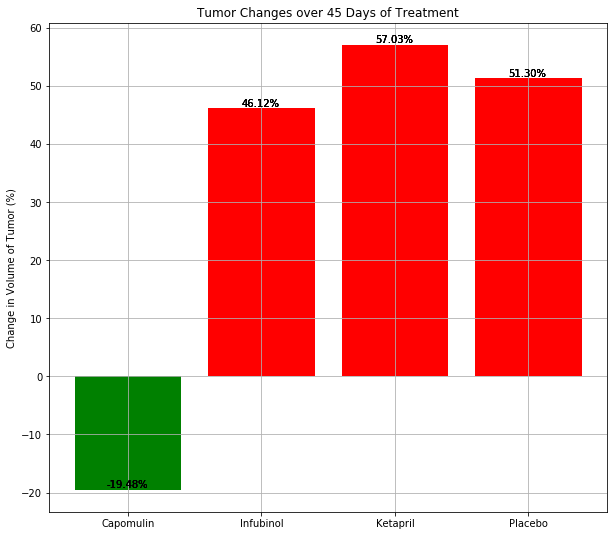

In [23]:
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 

fig, ax = plt.subplots(figsize=(10, 9))        
rects = ax.bar(drugs, changes[drugs])
def autolabel(rect):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(-1, 0), 
                    textcoords="offset points",
                    ha='center', va='bottom')
        
for drug in drugs:
    if changesdf.loc[drug,"Percentage"]<0:
        rect = ax.bar(drug, changes[drug], color="green")
        autolabel(rect)
    else:
        rect = ax.bar(drug, changes[drug], color="red")
        autolabel(rect)



plt.title("Tumor Changes over 45 Days of Treatment")
plt.xticks(drugs)
plt.ylabel("Change in Volume of Tumor (%)")
plt.grid(True)
# Save the Figure
plt.savefig("Tumor Changes over 45 Days of Treatment")

plt.show()